Content

1) Data Preprocess

2) Data Analysis

3) Predicition

In [1]:
#Important packages to Load 
import numpy as np              # For Linear Algebra
import pandas as pd             # For Data Preprocessing
import matplotlib.pyplot as plt # For Visualisation
import seaborn as sns           # for creating plots
import matplotlib.ticker as mtick # for specifying the axis tick format
import sklearn
from sklearn.preprocessing import StandardScaler  # For standardising Numerical Variable 
from sklearn.preprocessing import OrdinalEncoder  # For Standardising Categorical Variable.
from sklearn.model_selection import train_test_split #For splitting the data into train and test size
from sklearn.linear_model import LogisticRegression  # For constructig Logistic Regression model 
from sklearn import metrics                          #For metrics calculation
from sklearn.tree import DecisionTreeClassifier      #For constructing Tree Model
from sklearn import tree                             #For plotting Tree graph
from sklearn.metrics import confusion_matrix         #For calculating confusion matrix
from sklearn.metrics import classification_report    # For Classification report
from sklearn.neighbors import KNeighborsClassifier   #For constructing KNN model
from sklearn.ensemble import RandomForestClassifier  #For constructing RandomForest Classifier

In [2]:
#Loading the dataset
df=pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [12]:
df.head() # To see the top 5 rows of the data.

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [13]:
# To check random 10 rows of the data present in the dataset.
df.sample(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6738,3590-TCXTB,Male,0,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.35,20.35,No
822,7975-TZMLR,Male,0,No,No,47,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Electronic check,103.10,4889.3,No
4405,8417-FMLZI,Male,0,Yes,Yes,6,Yes,No,Fiber optic,No,...,No,No,No,Yes,Month-to-month,Yes,Credit card (automatic),83.55,477.55,Yes
6872,5297-MDOIR,Female,0,Yes,No,63,Yes,No,Fiber optic,Yes,...,Yes,No,No,No,One year,Yes,Credit card (automatic),81.15,5224.5,No
6980,0786-VSSUD,Male,1,No,No,16,No,No phone service,DSL,No,...,No,No,Yes,No,Month-to-month,Yes,Mailed check,39.00,679.85,Yes
970,7294-TMAOP,Female,0,No,No,1,Yes,No,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,No,Electronic check,90.55,90.55,Yes
1404,1970-KKFWL,Female,0,No,No,35,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),23.30,797.1,No
2288,2135-DQWAQ,Female,0,No,No,5,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Mailed check,85.30,420.45,No
4426,8652-YHIYU,Female,0,No,Yes,16,Yes,Yes,Fiber optic,No,...,No,Yes,No,No,One year,Yes,Credit card (automatic),79.50,1264.2,No
1126,0927-LCSMG,Male,0,No,No,7,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,No,Mailed check,74.65,544.55,Yes


In [14]:
df.shape
# There are 7043 rows and 21 columns present in the data.

(7043, 21)

In [15]:
#To get the information of each columns in the dataset. 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [16]:
#Checking the data types of all the attributes

df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

#### Here is the  Description of Features:


"CustomersID"-unique Id alloted to the customer.Its value type is String.

"gender"-Gender of the customer.Its value type is Object and Statistcal type is Categorical.

"SeniorCitizen"- Counts if the Customers falls under Senior Citizen or not.Value type is int and Statistical type is     
                 Categorical/Binary.
                 
"Partner"-If the customers has any partner existing.Value type is String.Statistical type is Categorical.

"Dependents"-If customer has any other  dependencies or not.Value type is String and statistical type is Categorical.

"Tenure"-Tenure of the customer.Value Type is int and Statistical type is Quantitative.

"PhoneService "-Customer has any service through Phone or not.Value type is String. Statistical type is Categorical.

"MultipleLines"-Customer has Multipleline service or not.Value type is Object and Statistical type is Categorical.

"InternetService"-Customer has Internet service or not.Value type is Object and Statistical type is Categorical.

"OnlineSecurity"-Customer has any Online security or not.Value type is Object and Statistical type is Categorical.

"OnlineBackup"-Is there any online backup for the customer.Value type is Object and Statistical type is Categorical.

"DeviceProtection"-Is there any device protection.Value type is Object and Statistical type is Categorical.

"TechSupport"-Is there any techsupport of the customer.Value type is Object and Statistical type is Categorical.

"StreamingTV"-Is there any StreamingTV of the customer.Value type is Object and Statistical type is Categorical.

"StreamingMovies"-Is there any Streamingmovies of the customer.Value type is Object and Statistical type is Categorical.

"Contract"--Customer has any Contract or not.Value type is Object and Statistical type is Categorical.

"PaperlessBilling"-Customer has any Paperlessbilling .Value type is Object and Statistical type is Categorical.

"PaymentMethod "-Payment method of customer.Value type is Object and Statistical type is Categorical.

"MonthlyCharges"-MonthlyCharges of customer .Value Type is float and Statistical type is Quantitative.

"TotalCharges "-TotalCharges of customer .Value Type is object and Statistical type is Quantitative.We wil change the data type                 from object to float.

"Churn"-The last data column, Churn, is our target variable. It is binary: True indicates that that the company eventually lost         this customer, and False indicates that the customer was retained. Later, we will build models that predict this               feature based on the remaining features. This is why we call it a target.

In [17]:
#To fetch the record of 1st row in the dataset.
df.loc[0]

customerID                7590-VHVEG
gender                        Female
SeniorCitizen                      0
Partner                          Yes
Dependents                        No
tenure                             1
PhoneService                      No
MultipleLines       No phone service
InternetService                  DSL
OnlineSecurity                    No
OnlineBackup                     Yes
DeviceProtection                  No
TechSupport                       No
StreamingTV                       No
StreamingMovies                   No
Contract              Month-to-month
PaperlessBilling                 Yes
PaymentMethod       Electronic check
MonthlyCharges                 29.85
TotalCharges                   29.85
Churn                             No
Name: 0, dtype: object

In [21]:
# To check the  if any null values present  as per column .
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

There is only one column which has Null values in the it.
"TotalCharges" has 11 Null values,so we will treat it accordingly.

In [22]:
# To check unique values present in the columns .
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

There are 7043 customers having 7043 unique id.

There are 2 "Gender" mentioned i.e Male and Female,  termed as Categorical variable.

There are 2 unique "SeniorCitizen" category in the dataset.

There are  2  unique "Partner" Category mentioned here.

"Dependents" column has 2 unique category. 

"tenure" column has 73 unique data.

"PhoneService" has 2 unique data.

"MultipleLines" has 3 unique data.

"InternetService" has 3 unique data.

"OnlineSecurity" has 3 unique data.

"OnlineBackup" has 3 unique data.

"DeviceProtection" has 3 unique data.

"TechSupport" has 3 unique data.

"StreamingTV" has 3 unique data.

"StreamingMovies" has 3 unique data.

"Contract" has 3 unique data.

"PaperlessBilling" has 2 unique data.

"PaymentMethod" has 4 unique data.

"MonthlyCharges" has 1585 unique data.

"TotalCharges" has 6531 unique data.

"Churn" has 2 unique data.
























### Checking the duplicate Values  present in the data.

In [23]:
#Deleting duplicate values from the data table.

print('Entrées dupliquées: {}'.format(df.duplicated().sum()))
df.drop_duplicates(inplace = True)

Entrées dupliquées: 0


There are no duplicate data found in the data.

### To change the data types of columns into respective data type required.

In [24]:
#Since data type of "Totalcharges" column has object data type,which is not in proper format.
#So we will change it to numeric format.

df.TotalCharges = pd.to_numeric(df.TotalCharges,errors='coerce')


In [25]:
df.dtypes
# Now we can see that "TotalCharges" column has been converted into Float data type.

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

### Treating Null Values 

In [26]:
df["TotalCharges"].value_counts()

20.20      11
19.75       9
20.05       8
19.65       8
19.90       8
           ..
6424.70     1
1474.35     1
6668.35     1
6096.90     1
5867.00     1
Name: TotalCharges, Length: 6530, dtype: int64

In [27]:
df["TotalCharges"].median()
# To replace null values of this column, we will fill it with median values of the column.

1397.475

In [28]:
df["TotalCharges"].fillna(df["TotalCharges"].median(),inplace=True)

In [29]:
df["TotalCharges"].isna().value_counts()
# Now we can see  that none of the values are null.

False    7043
Name: TotalCharges, dtype: int64

### To check  statistical Explanation of the numerical data.

In [30]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2281.916928
std,0.368612,24.559481,30.090047,2265.270398
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


There is minimum tenure of  0 and maximum tenure of 72.

Monthly charges has minimum value of 18.25, maximum of 118.75 and mean value of 64.76.

Maximum Total Charges is 8684 and minimum charge is 18.8.

Senior Citizen Column should be in a Categorical variable type,because it has only two unique values,therefore we should change the data type from int to object.

In [31]:
df["SeniorCitizen"] =df["SeniorCitizen"].astype("object")

In [32]:
df.dtypes

customerID           object
gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [33]:
#To Categorize categorical columns and numerical columns separately in a list in the data.

cat=[]
num=[]
for i in df.columns:
    if df[i].dtypes==object:
        cat.append(i)
    else:
        num.append(i)

print('The numerical data are :{}'.format(num))
print('The categorical data are :{}'.format(cat))

The numerical data are :['tenure', 'MonthlyCharges', 'TotalCharges']
The categorical data are :['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


In [55]:
# We will drop the Customer Id column ,
#since it has unique id for each upcoming Customer ,so will not be any reference of for training model.

df.drop(["customerID"],inplace=True , axis=1)

KeyError: "['customerID'] not found in axis"

### Visualisation

#### Univariate visualization
Univariate analysis looks at one feature at a time. When we analyze a feature independently, we are usually mostly interested in the distribution of its values and ignore other features in the dataset.

Below, we will consider different statistical types of features and the corresponding tools for their individual visual analysis.

2.1 Quantitative features
Quantitative features take on ordered numerical values. Those values can be discrete, like integers, or continuous, like real numbers, and usually express a count or a measurement.

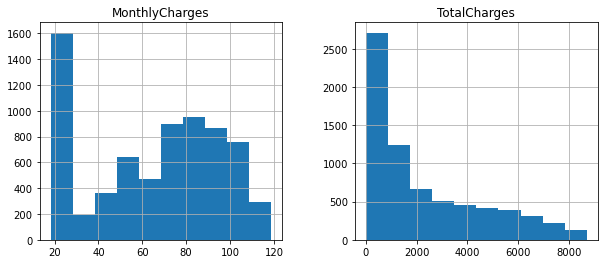

In [34]:
features = ["MonthlyCharges", "TotalCharges"]
df[features].hist(figsize=(10, 4));

A histogram groups values into bins of equal value range. The shape of the histogram may contain clues about the underlying distribution type: Gaussian, exponential, etc. We can also spot any skewness in its shape when the distribution is nearly regular but has some anomalies. Knowing the distribution of the feature values becomes important when you use Machine Learning methods that assume a particular type (most often Gaussian).

In the above plot, we see that the variable "Monthlycharges" is normally distributed,but containes outlier in the left side, while Total Charges is prominently skewed righly (its tail is longer on the right).

There is also another, often clearer, way to grasp the distribution: density plots or, more formally, Kernel Density Plots. They can be considered a smoothed version of the histogram. Their main advantage over the latter is that they do not depend on the size of the bins. Let's create density plots for the same two variables:

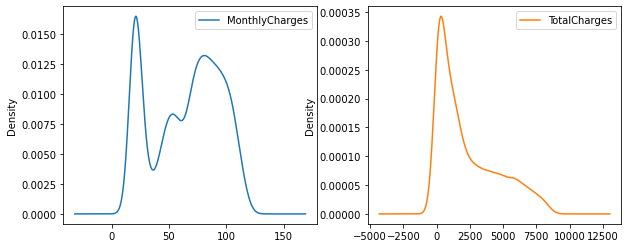

In [35]:
df[features].plot(
    kind="density", subplots=True, layout=(1, 2), sharex=False, figsize=(10, 4)
);

C:\Users\NAMRATA KESHRI\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


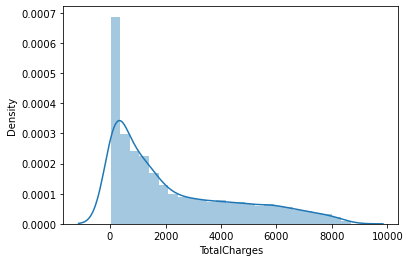

In [36]:
sns.distplot(df["TotalCharges"]);

C:\Users\NAMRATA KESHRI\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


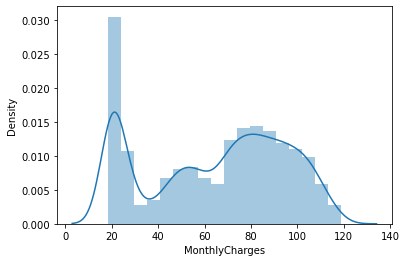

In [37]:
sns.distplot(df["MonthlyCharges"]);

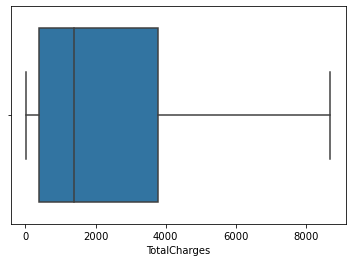

In [38]:
sns.boxplot(x="TotalCharges", data=df);

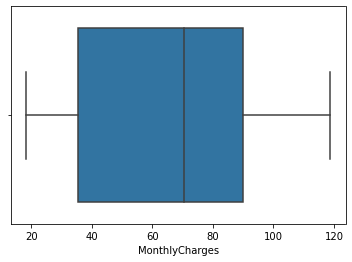

In [39]:
sns.boxplot(x="MonthlyCharges", data=df);

In [40]:
TotalCharges=np.log(df["TotalCharges"])

In [41]:
MonthlyCharges=np.log(df["MonthlyCharges"])

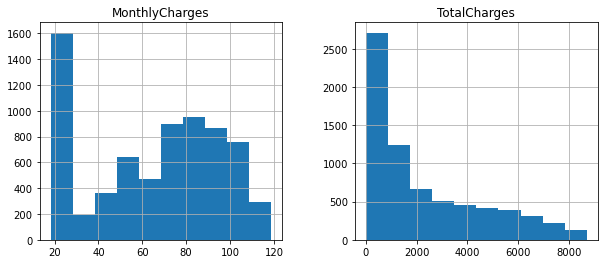

In [42]:
features = ["MonthlyCharges", "TotalCharges"]
df[features].hist(figsize=(10, 4));

C:\Users\NAMRATA KESHRI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


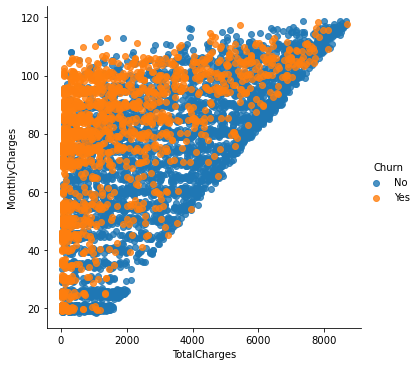

In [43]:
sns.lmplot("TotalCharges", "MonthlyCharges", data=df, hue="Churn", fit_reg=False);

Those customers who have high monthly charges and low total charges are more likely to churn out from the company.
Those customers who have mid to high Total charges are less likely to leave the company.

C:\Users\NAMRATA KESHRI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


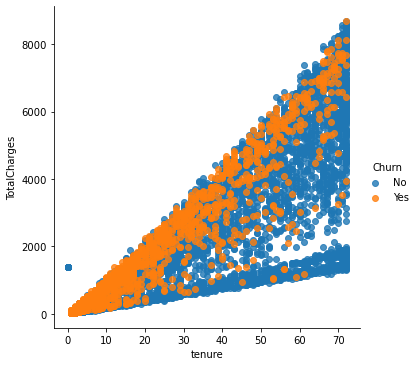

In [44]:
sns.lmplot("tenure","TotalCharges", data=df, hue="Churn", fit_reg=False);

Customers who have less tenure of work and less Total charges are more likely to churn from the company.

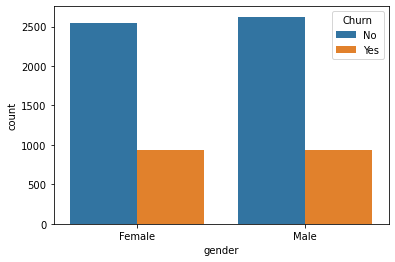

In [45]:
sns.countplot(x="gender", hue="Churn", data=df);

Almost Equal proportion of Male and Female Churn out from the company.

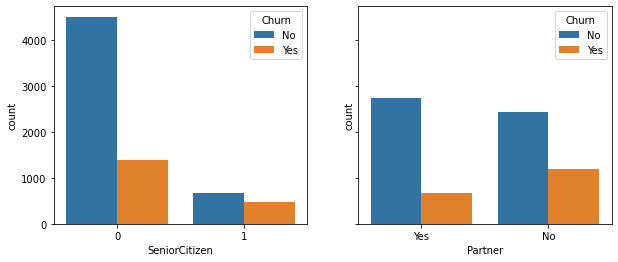

In [46]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(10, 4))

sns.countplot(x="SeniorCitizen", hue="Churn", data=df, ax=axes[0])
sns.countplot(x="Partner", hue="Churn", data=df, ax=axes[1]);

If customer is not senior citizen then count of  customers remaining in the company is more .

And Customers with Partner  are 50% likely to churn out from the company.And customers without partner are 45% likely to churn out from the company.





#### Our target variable is Churn. So, we should check how each attribute correlates with the Churn variable. We can do it as follows:

In [49]:
#Correlation of other features with churn attribute

#Convert the predictor variable in a binary numeric variable
df['Churn'].replace(to_replace='Yes', value = 1, inplace = True)
df['Churn'].replace(to_replace='No', value = 0, inplace = True)

correlation = df.corr()
correlation['Churn'].sort_values(ascending=False)

Churn             1.000000
MonthlyCharges    0.193356
TotalCharges     -0.199037
tenure           -0.352229
Name: Churn, dtype: float64

The correlation coefficient ranges from -1 to +1.

When it is close to +1, this signifies that there is a strong positive correlation. So, we can see that there is no strong positive correlation between Outcome and any of the column.

When it is clsoe to -1, it means that there is a strong negative correlation. When it is close to 0, it means that there is no correlation.

We can see that all the variables are not correlated with Churn variable.

In [56]:
#Convert all the categorical variables into dummy variables

df_dummy = pd.get_dummies(df)
df_dummy.head() # Number of columns will be increased

,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,0,1,0,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0
1,34,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,1,0,1,0,0,0,0,1
2,2,53.85,108.15,1,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1
3,45,42.30,1840.75,0,0,1,1,0,1,0,...,0,0,1,0,1,0,1,0,0,0
4,2,70.70,151.65,1,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0


<AxesSubplot:>

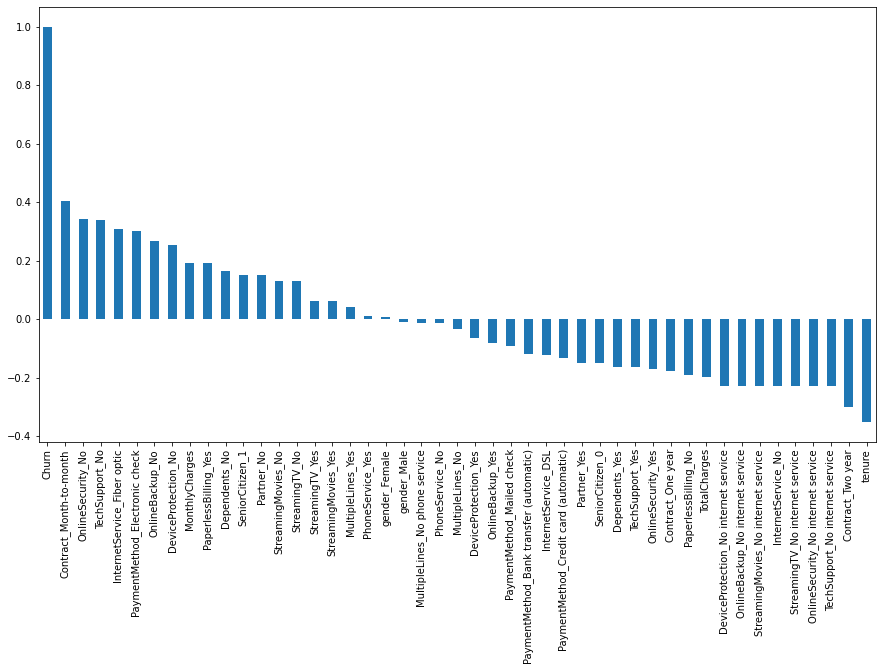

In [57]:
#Correlation of other features with churn attribute

plt.figure(figsize=(15,8))
df_dummy.corr()['Churn'].sort_values(ascending=False).plot(kind='bar')

Month-to-month contracts, a lack of online security, and technical support all appear to be linked to churn. While tenure appears to be positively connected with churn, two-year contracts appear to be adversely correlated.

Surprisingly, services that require an internet connection, such as online security, streaming TV, online backup, tech assistance, and so on, appear to be negatively associated with churn.

Before we go into modeling and identifying the essential variables, we'll look at the patterns for the above relationships.

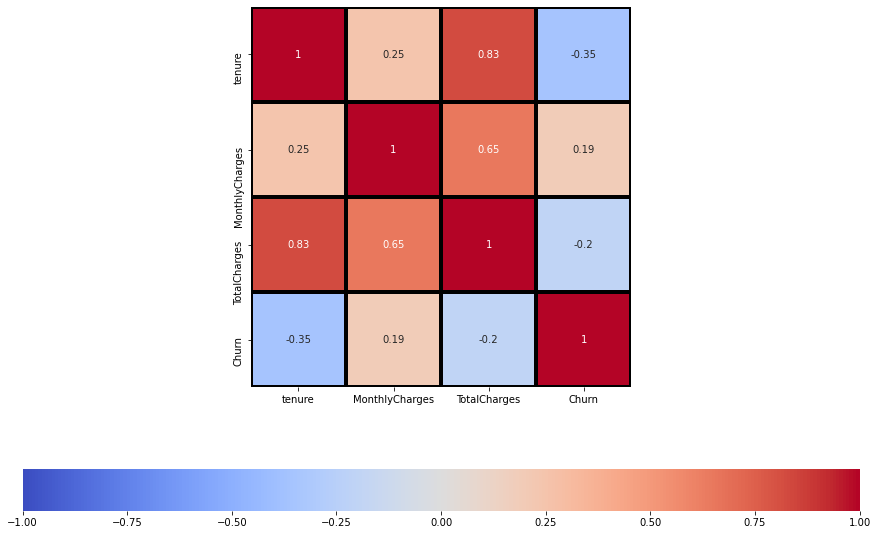

In [59]:
#To check the correlation between the variables

f,ax=plt.subplots(figsize=(15,10))
sns.heatmap(df.corr() ,annot=True ,fmt='.2g', vmax=1,vmin=-1,center=0, cmap="coolwarm",linewidths=3,linecolor='black' , cbar_kws= {'orientation': 'horizontal'} ,square=True,ax=ax)
plt.show()

### Data Exploration

Let's begin by exploring our data collection in order to better comprehend the trends and possibly create some hypotheses. We'll start by looking at the distribution of individual variables, then slice and dice our data to see if there are any noteworthy trends.

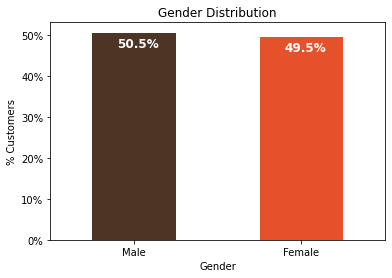

In [60]:
# We will first find gender distribution in our dataset
colors = ['#4D3425','#E4512B']
ax = (df['gender'].value_counts()*100.0 /len(df)).plot(kind='bar', stacked = True,rot = 0,color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers')
ax.set_xlabel('Gender')
ax.set_ylabel('% Customers')
ax.set_title('Gender Distribution')

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-3.5, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold')


From this analysis we can say that about half of the customers in our data set are male while the other half are female

Text(0.5, 1.0, '% of Senior Citizens')

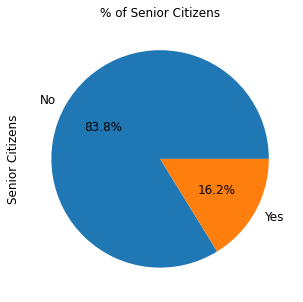

In [61]:
# Senior Citizen
ax = (df['SeniorCitizen'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(5,5), fontsize = 12 )                                                                           
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('Senior Citizens',fontsize = 12)
ax.set_title('% of Senior Citizens', fontsize = 12)


From this pie chart we can say that there are only 16% of the customers who are senior citizens. Thus most of our customers in the data are younger people.

C:\Users\NAMRATA KESHRI\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, '# of Customers by their tenure')

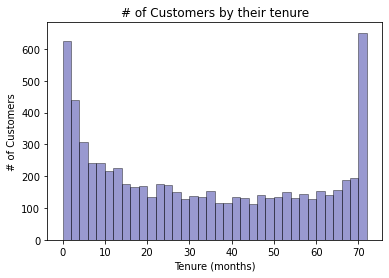

In [62]:
# We will now look at the Tenure
ax = sns.distplot(df['tenure'], hist=True, kde=False, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('# of Customers by their tenure')

Looking at the histogram above, we can see that many consumers have only been with the telecom firm for a month, while others have been with them for over 72 months. This could be due to the fact that each customer has a separate contract. As a result, depending on the contract, clients may find it simpler or more difficult to stay with or quit the telecom firm.

Text(0.5, 1.0, '# of Customers by Contract Type')

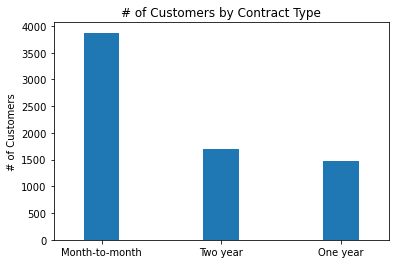

In [63]:
# contracts
ax = df['Contract'].value_counts().plot(kind = 'bar',rot = 0, width = 0.3)
ax.set_ylabel('# of Customers')
ax.set_title('# of Customers by Contract Type')

As can be seen from this graph, the majority of consumers are on a month-to-month basis. The 1 year and 2 year contracts have an equal number of consumers

Text(0.5, 1.0, 'Two Year Contract')

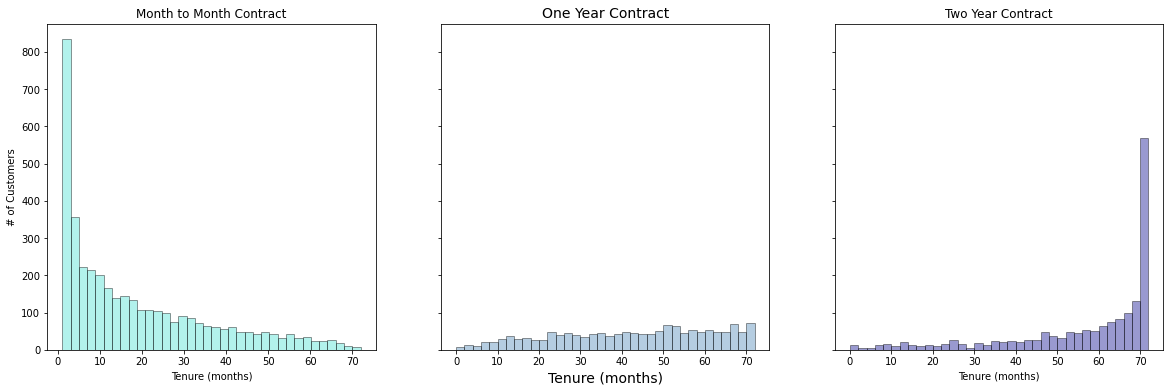

In [64]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, sharey = True, figsize = (20,6))

ax = sns.distplot(df[df['Contract']=='Month-to-month']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'turquoise',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax1)
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('Month to Month Contract')

ax = sns.distplot(df[df['Contract']=='One year']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'steelblue',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax2)
ax.set_xlabel('Tenure (months)',size = 14)
ax.set_title('One Year Contract',size = 14)

ax = sns.distplot(df[df['Contract']=='Two year']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'darkblue',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax3)

ax.set_xlabel('Tenure (months)')
ax.set_title('Two Year Contract')

Surprisingly, most monthly contracts are for 1-2 months, although two-year contracts are typically for 70 months. This demonstrates that customers who sign a lengthier contract are more loyal to the company and are more likely to stay with it for a longer time.

This is also what we noticed in the churn rate correlation chart previously.

### Let us now look at the distribution of various services used by customers¶

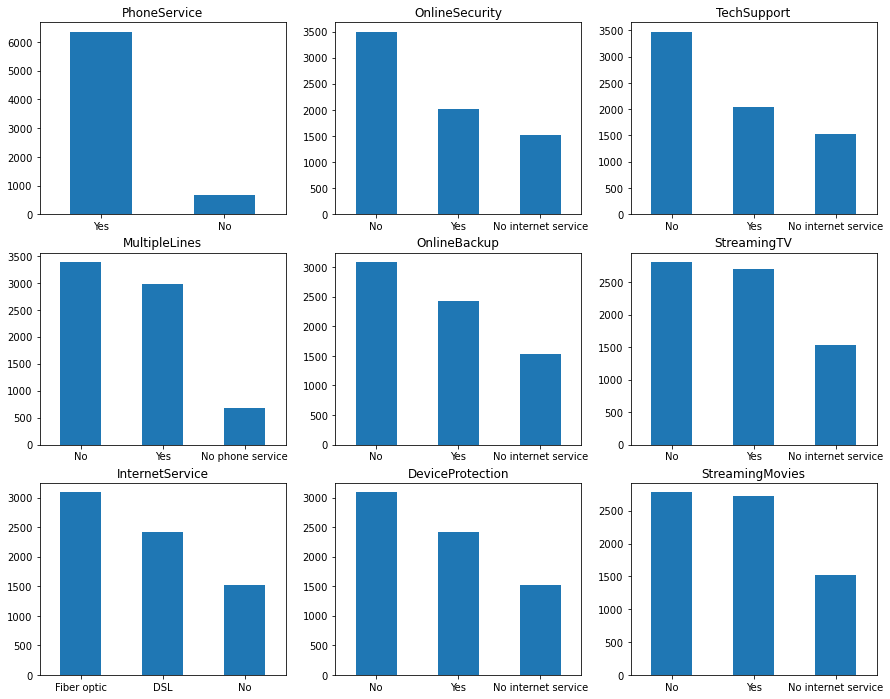

In [65]:
services = ['PhoneService','MultipleLines','InternetService','OnlineSecurity',
           'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

fig, axes = plt.subplots(nrows = 3,ncols = 3,figsize = (15,12))
for i, item in enumerate(services):
    if i < 3:
        ax = df[item].value_counts().plot(kind = 'bar',ax=axes[i,0],rot = 0)
        
    elif i >=3 and i < 6:
        ax = df[item].value_counts().plot(kind = 'bar',ax=axes[i-3,1],rot = 0)
        
    elif i < 9:
        ax = df[item].value_counts().plot(kind = 'bar',ax=axes[i-6,2],rot = 0)
    ax.set_title(item)

#### Now let's take a quick look at the relation between monthly and total charges


We will observe that the total charges increases as the monthly bill for a customer increases

<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

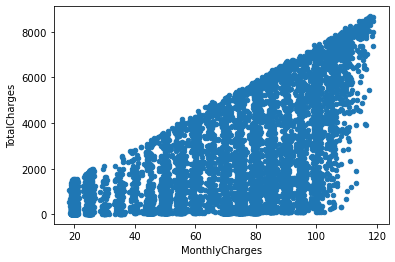

In [66]:
df[['MonthlyCharges', 'TotalCharges']].plot.scatter(x = 'MonthlyCharges', y='TotalCharges')

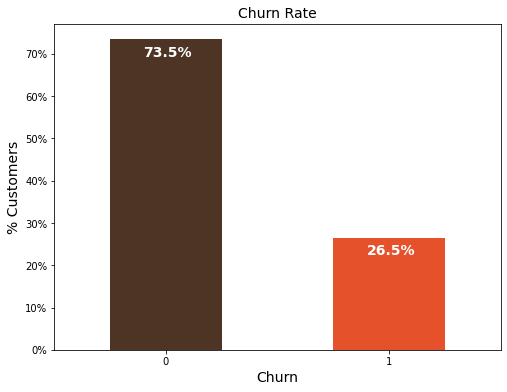

In [67]:
# In the last we will look at out the predicator variable and understand its interaction with other important variables as was found in the correlation plot.

colors = ['#4D3425','#E4512B']
ax = (df['Churn'].value_counts()*100.0 /len(df)).plot(kind='bar',
                                                                           stacked = True,
                                                                          rot = 0,
                                                                          color = colors,
                                                                         figsize = (8,6))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers',size = 14)
ax.set_xlabel('Churn',size = 14)
ax.set_title('Churn Rate', size = 14)

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-4.0, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold',
           size = 14)

According to our research, 74% of customers do not churn. We would anticipate a significant majority of customers to not churn, hence the data is clearly skewed. This is vital to remember when modeling because skewness might result in a lot of false negatives. We'll look at methods to avoid skewness in the data in the modeling section.

<AxesSubplot:xlabel='Churn', ylabel='tenure'>

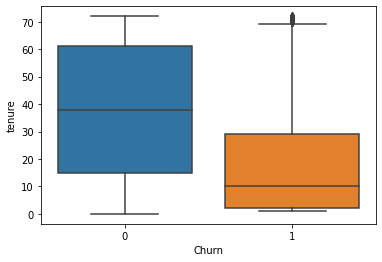

In [68]:
#Churn vs Tenure
sns.boxplot(x = df.Churn, y = df.tenure)

Customers who do not churn, as seen in the graph above, tend to stay with the telecom operator for a longer period of time.

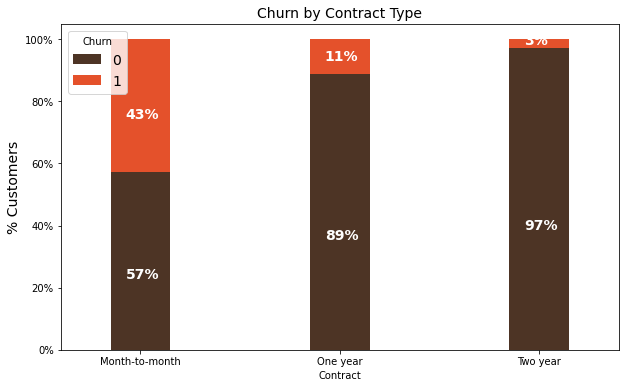

In [69]:
# churn vs contract type

colors = ['#4D3425','#E4512B']
contract_churn = df.groupby(['Contract','Churn']).size().unstack()

ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.3,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (10,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers',size = 14)
ax.set_title('Churn by Contract Type',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

Customers who have a month-to-month contract have a very high churn rate, similar to what we noticed in the correlation graphic.

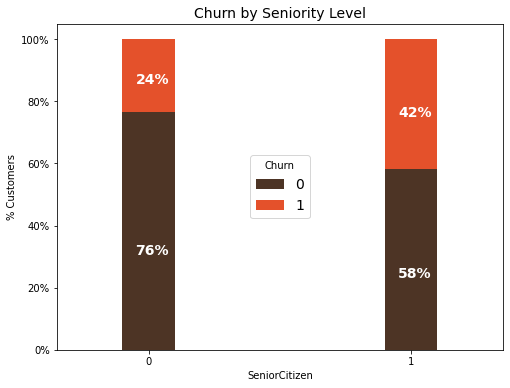

In [70]:
# churn by senority
colors = ['#4D3425','#E4512B']
seniority_churn = df.groupby(['SeniorCitizen','Churn']).size().unstack()

ax = (seniority_churn.T*100.0 / seniority_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.2,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (8,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers')
ax.set_title('Churn by Seniority Level',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',size =14)

Senior Citizens have almost double the churn rate than younger population.

### Segregating the X and y for Training the data.

In [73]:
#DEfining X and y for training the data.

X=df.drop(["Churn"],axis=1)
y=df["Churn"]

In [74]:
num_data=X[['tenure', 'MonthlyCharges', 'TotalCharges']]
cat_data=X[['gender','SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
            'MultipleLines', 'InternetService', 'OnlineSecurity', 
            'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 
            'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']]

In [75]:
# For standardising the numerical variable.

sc=StandardScaler()

In [76]:
num_sc=sc.fit_transform(num_data)
num_df=pd.DataFrame(num_sc,columns=num_data.columns)
num_df.head()    #Standardised Numerical Data.

,tenure,MonthlyCharges,TotalCharges
0,-1.277445,-1.160323,-0.994242
1,0.066327,-0.259629,-0.173244
2,-1.236724,-0.362660,-0.959674
3,0.514251,-0.746535,-0.194766
4,-1.236724,0.197365,-0.940470


In [77]:
#For standardising Categorical variable.
oe=OrdinalEncoder() 
cat_oe=oe.fit_transform(cat_data)
cat_df=pd.DataFrame(cat_oe,columns=cat_data.columns)


In [78]:
cat_df.head() #Standardised Categorical variable

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0


In [79]:
concat=pd.concat([num_df,cat_df],axis=1)   #Combining  both the Standardised Numerical and Categorical dataset in a X dataset.

In [80]:
X=concat.copy()

In [81]:
X
#Now we got the Standardised data for all the columns.

,tenure,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,-1.277445,-1.160323,-0.994242,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0
1,0.066327,-0.259629,-0.173244,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0
2,-1.236724,-0.362660,-0.959674,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0
3,0.514251,-0.746535,-0.194766,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0
4,-1.236724,0.197365,-0.940470,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,-0.340876,0.665992,-0.128655,1.0,0.0,1.0,1.0,1.0,2.0,0.0,2.0,0.0,2.0,2.0,2.0,2.0,1.0,1.0,3.0
7039,1.613701,1.277533,2.243151,0.0,0.0,1.0,1.0,1.0,2.0,1.0,0.0,2.0,2.0,0.0,2.0,2.0,1.0,1.0,1.0
7040,-0.870241,-1.168632,-0.854469,0.0,0.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0
7041,-1.155283,0.320338,-0.872062,1.0,1.0,1.0,0.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0


In [82]:
#Training the model

X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=42)

### Logistic  Regression Model

In [83]:
# logistic Regression model

model_lr = LogisticRegression()
model_lr.fit(X_train , y_train)
y_pred=model_lr.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8106956933270232


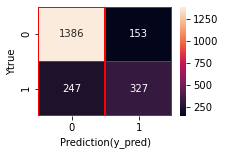

In [84]:
CM = confusion_matrix(y_test,y_pred)
f, ax = plt.subplots(figsize=(3,2))
sns.heatmap(CM,annot = True, linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Prediction(y_pred)")
plt.ylabel("Ytrue")
plt.show()

In [85]:
print(confusion_matrix(y_test, y_pred))

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

print('\nTrue Positives(TP) = ', CM[0,0])

print('\nTrue Negatives(TN) = ', CM[1,1])

print('\nFalse Positives(FP) = ', CM[0,1])

print('\nFalse Negatives(FN) = ', CM[1,0])

[[1386  153]
 [ 247  327]]

True Positives(TP) =  1386

True Negatives(TN) =  327

False Positives(FP) =  153

False Negatives(FN) =  247


In [86]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1539
           1       0.68      0.57      0.62       574

    accuracy                           0.81      2113
   macro avg       0.76      0.74      0.75      2113
weighted avg       0.80      0.81      0.81      2113



In [87]:
TP = CM[0,0]
TN = CM[1,1]
FP = CM[0,1]
FN = CM[1,0]
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

# print precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

true_positive_rate = TP / float(TP + FN)

specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))



print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

false_positive_rate = FP / float(FP + TN)


print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

Classification accuracy : 0.8107
Precision : 0.9006
Recall or Sensitivity : 0.8487
Specificity : 0.6813
True Positive Rate : 0.8487
False Positive Rate : 0.3187


AxesSubplot(0.125,0.125;0.775x0.755)


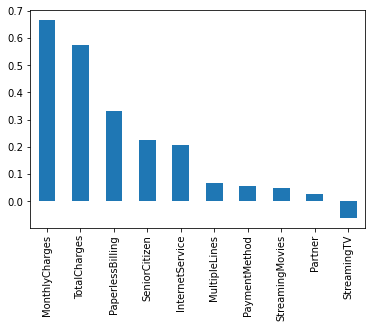

In [88]:
# To get the weights of all the variables
weights = pd.Series(model_lr.coef_[0],
                 index=X.columns.values)
print (weights.sort_values(ascending = False)[:10].plot(kind='bar'))

AxesSubplot(0.125,0.125;0.775x0.755)


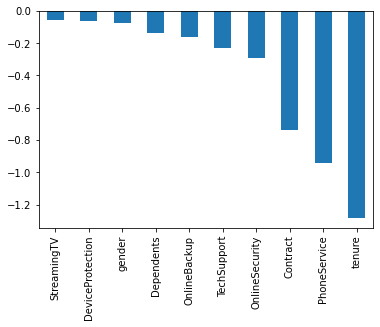

In [89]:
print(weights.sort_values(ascending = False)[-10:].plot(kind='bar'))

Some variables have a negative relationship with our anticipated variable (Churn), whereas others have a positive relationship. A negative relationship indicates that the likelihood of churn decreases as the variable is increased. Let's have a look at some of the more intriguing features:

-> A two-year contract minimizes the likelihood of churn. According to logistic regressions, a two-year contract with tenure      has the highest negative relationship with churn.

-> Churn is also less likely when you have DSL internet connection.

-> Finally, increased churn rates might be caused by total prices, monthly contracts, fiber optic internet services, and          seniority. This is intriguing because, despite the fact that fiber optic services are quicker, customers are more likely to    churn as a result.

###  Decision Tree Model

In [90]:
 # Tree model using criterion
    
model_tree = DecisionTreeClassifier(criterion="entropy", max_depth=4)

# Train Decision Tree Classifer
model_tree = model_tree.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = model_tree.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7856128726928537


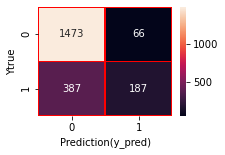

In [91]:
CM = confusion_matrix(y_test,y_pred)
f, ax = plt.subplots(figsize=(3,2))
sns.heatmap(CM,annot = True, linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Prediction(y_pred)")
plt.ylabel("Ytrue")
plt.show()

In [92]:
print(confusion_matrix(y_test, y_pred))

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

print('\nTrue Positives(TP) = ', CM[0,0])

print('\nTrue Negatives(TN) = ', CM[1,1])

print('\nFalse Positives(FP) = ', CM[0,1])

print('\nFalse Negatives(FN) = ', CM[1,0])

[[1473   66]
 [ 387  187]]

True Positives(TP) =  1473

True Negatives(TN) =  187

False Positives(FP) =  66

False Negatives(FN) =  387


In [93]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.96      0.87      1539
           1       0.74      0.33      0.45       574

    accuracy                           0.79      2113
   macro avg       0.77      0.64      0.66      2113
weighted avg       0.78      0.79      0.75      2113



In [94]:
TP = CM[0,0]
TN = CM[1,1]
FP = CM[0,1]
FN = CM[1,0]
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

# print precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

true_positive_rate = TP / float(TP + FN)

specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))



print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

false_positive_rate = FP / float(FP + TN)


print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

Classification accuracy : 0.7856
Precision : 0.9571
Recall or Sensitivity : 0.7919
Specificity : 0.7391
True Positive Rate : 0.7919
False Positive Rate : 0.2609


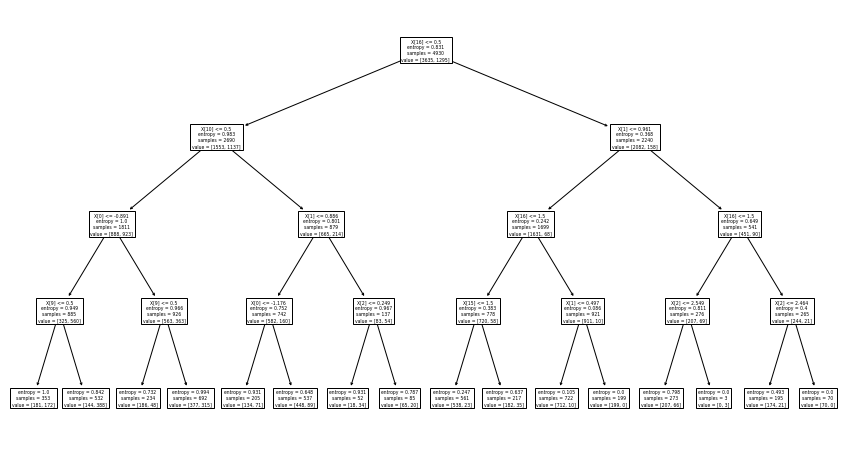

In [95]:
plt.figure(figsize = (15, 8))
tree.plot_tree(model_tree);
plt.axis('off');
plt.show();

### KNN Model 

In [96]:
model_knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
model_knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean')

In [97]:
y_pred = model_knn.predict(X_test)

In [98]:
print (metrics.accuracy_score(y_test, y_pred))

0.7628963558920966


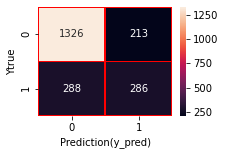

In [99]:
CM = confusion_matrix(y_test,y_pred)
f, ax = plt.subplots(figsize=(3,2))
sns.heatmap(CM,annot = True, linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Prediction(y_pred)")
plt.ylabel("Ytrue")
plt.show()

In [100]:
confusion_matrix(y_test, y_pred)

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

print('\nTrue Positives(TP) = ', CM[0,0])

print('\nTrue Negatives(TN) = ', CM[1,1])

print('\nFalse Positives(FP) = ', CM[0,1])

print('\nFalse Negatives(FN) = ', CM[1,0])


True Positives(TP) =  1326

True Negatives(TN) =  286

False Positives(FP) =  213

False Negatives(FN) =  288


In [101]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84      1539
           1       0.57      0.50      0.53       574

    accuracy                           0.76      2113
   macro avg       0.70      0.68      0.69      2113
weighted avg       0.75      0.76      0.76      2113



In [102]:
TP = CM[0,0]
TN = CM[1,1]
FP = CM[0,1]
FN = CM[1,0]
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

# print precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

true_positive_rate = TP / float(TP + FN)

specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))



print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

false_positive_rate = FP / float(FP + TN)


print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

Classification accuracy : 0.7629
Precision : 0.8616
Recall or Sensitivity : 0.8216
Specificity : 0.5731
True Positive Rate : 0.8216
False Positive Rate : 0.4269


### RandomForest Classifier

In [103]:
model_rf = RandomForestClassifier(n_estimators=1000 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
model_rf.fit(X_train, y_train)

# Make predictions
y_pred = model_rf.predict(X_test)
print (metrics.accuracy_score(y_test, y_pred))

0.7969711310932324


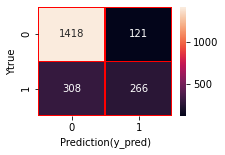

In [104]:
CM = confusion_matrix(y_test,y_pred)
f, ax = plt.subplots(figsize=(3,2))
sns.heatmap(CM,annot = True, linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Prediction(y_pred)")
plt.ylabel("Ytrue")
plt.show()

In [105]:
confusion_matrix(y_test, y_pred)

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

print('\nTrue Positives(TP) = ', CM[0,0])

print('\nTrue Negatives(TN) = ', CM[1,1])

print('\nFalse Positives(FP) = ', CM[0,1])

print('\nFalse Negatives(FN) = ', CM[1,0])


True Positives(TP) =  1418

True Negatives(TN) =  266

False Positives(FP) =  121

False Negatives(FN) =  308


In [106]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87      1539
           1       0.69      0.46      0.55       574

    accuracy                           0.80      2113
   macro avg       0.75      0.69      0.71      2113
weighted avg       0.79      0.80      0.78      2113



In [107]:
TP = CM[0,0]
TN = CM[1,1]
FP = CM[0,1]
FN = CM[1,0]
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

# print precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

true_positive_rate = TP / float(TP + FN)

specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))



print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

false_positive_rate = FP / float(FP + TN)


print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

Classification accuracy : 0.7970
Precision : 0.9214
Recall or Sensitivity : 0.8216
Specificity : 0.6873
True Positive Rate : 0.8216
False Positive Rate : 0.3127


<AxesSubplot:>

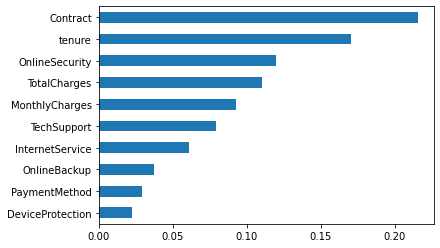

In [108]:
importances = model_rf.feature_importances_
weights = pd.Series(importances,
                 index=X.columns.values)
weights.sort_values()[-10:].plot(kind = 'barh')

Observations:

From random forest algorithm, monthly contract, tenure and total charges are the most important predictor variables to predict churn.
The results from random forest are very similar to that of the logistic regression and in line to what we had expected from our EDA

#### Logistic Regression Model is the best model to  go forward with by evaluating all the criteria above having Accuracy Score of 81 % after training the model.